# Lab Assignment 3 of Image Processing
**Mansi Kakkar**

**EE21S063**

**Space-invariant Blurring**

Perform Gaussian blurring on Mandrill.pgm with standard deviation σ. Assume space-invariant blur and a kernel of size ⌈6σ+1⌉×⌈6σ+1⌉. Observe the outputs for these values of σ: 1.6,1.2,1.0,0.6,0.3 and 0.0.


**IMPORTING LIBRARIES**

* imageio : for reading the image

* numpy : for finding size of image

* matplotlib : for plotting the function



In [88]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**READING IMAGE**


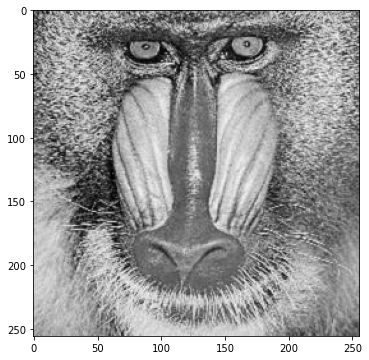

In [89]:
#Reading image
img = io.imread('Mandrill.png')
plt.figure(figsize = (6,6))
plt.imshow(img,'gray')

**GETTING THE KERNEL SIZE**

As was explained in the notes and so is mentioned in the problem statement we have taken kernel size to $[6 \sigma + 1]$.

It has to be taken in such a way that kernal size is odd

In [90]:
#get size
def get_kernel_size(sigma):
    #defining window size
    size = m.ceil((sigma*6)+1)
    #checking whether it is odd or not ; if not then incrementing the size to odd
    if size%2==0:
        size = size+1
    return size

**DEFINING THE GAUSSIAN BLUR KERNEL**

Constructing the Gaussian Kernel with Normal Distibution formula given standard deviation &\sigma$ . 

The Gaussian Kernel is defined as : 

$G(i,j) = \frac{1}{2\pi\sigma^2} \exp^{\frac{-x^2 - y^2}{2 \sigma^2}}$

We have nomalised it as the entries of G might not sum upto 1, such that

$G(i,j) = \frac{1}{2\pi\sigma^2 S} \exp^{\frac{-x^2 - y^2}{2 \sigma^2}}$

Since, we have done this in class as well that the kernel's values must sum upto 1 otherwise if would experience variations in the image




In [91]:
#Defining Gaussian Kernel
def gaussian_kernel(sigma):
    size = get_kernel_size(sigma)
    #creating blank kernel
    kernel = np.zeros((size, size))
    #absolute half of the size
    s_c = size//2
    
    #for condition where sigma is 0
    if size==1:
        kernel = np.ones((size, size))
        return kernel
    
    #defining kernel
    for x in range(size):
        for y in range(size):
            temp = np.exp((-((x-s_c)**2)-((y-s_c)**2))/(2*(sigma**2)))
            kernel[x,y] = temp / (2*m.pi*(sigma**2))
            
    #dividing by th sum of kernel
    kernel = kernel/sum(kernel)
    return kernel
    

**ZERO PADDED IMAGE**

Zero padding the image with a thickness of $size/2$ , since while multiplying the kernel for the edges in 2D Convolution we lack of values in image at the edges as compared to the kernel size. So we have padded the image will half the kernel size so that 2D convolution can be done.

In [92]:
#Zero Padding the Image
def zero_padded_image(source, size):
    #padding size
    p = size//2
    [x,y] = np.shape(source)
    new_img = np.zeros((x+2*p,y+2*p))
    #New Image
    new_img[p:-p,p:-p] = source
    return new_img
    

**2D CONVOLUTION**




In [93]:
#2D Convolution
def convolution_2D(source, sigma):
    #Getting the shape of the image
    [x, y] = np.shape(source)
    size = get_kernel_size(sigma)
    p = size//2
    #If the size of the kernel is 1, return the original image
    if size==1:
        return source
    #getting the padded image
    padded_image = zero_padded_image(source, size)
    #getting the kernel
    kernel = gaussian_kernel(sigma)
    #flipping the kernel for convolution operation
    kernel = kernel[::-1, ::-1]
    #constructing blank convolved image
    convolved_image = np.zeros((x,y))
    
    #performing convolution
    for i in range(p, x+p):
        for j in range(p, y+p):
            #taking blank matrix of size = kernel's size 
            #to perform multiplication of indivisual elements of the matrices
            mat = padded_image[i-p:i+p+1, j-p:j+p+1]
            convolved_image[i-p,j-p] = np.sum(mat*kernel)
    return convolved_image
    
    

**RESULTS**

Getting outputs


In [110]:
#Assigning sigma values as given in the problem statement to sigma
sigma = [0.0, 0.3, 0.6, 1.0, 1.2, 1.6]
#output images
op1 = convolution_2D(img, sigma[0])
op2 = convolution_2D(img, sigma[1])
op3 = convolution_2D(img, sigma[2])
op4 = convolution_2D(img, sigma[3])
op5 = convolution_2D(img, sigma[4])
op6 = convolution_2D(img, sigma[5])

**PLOTS**

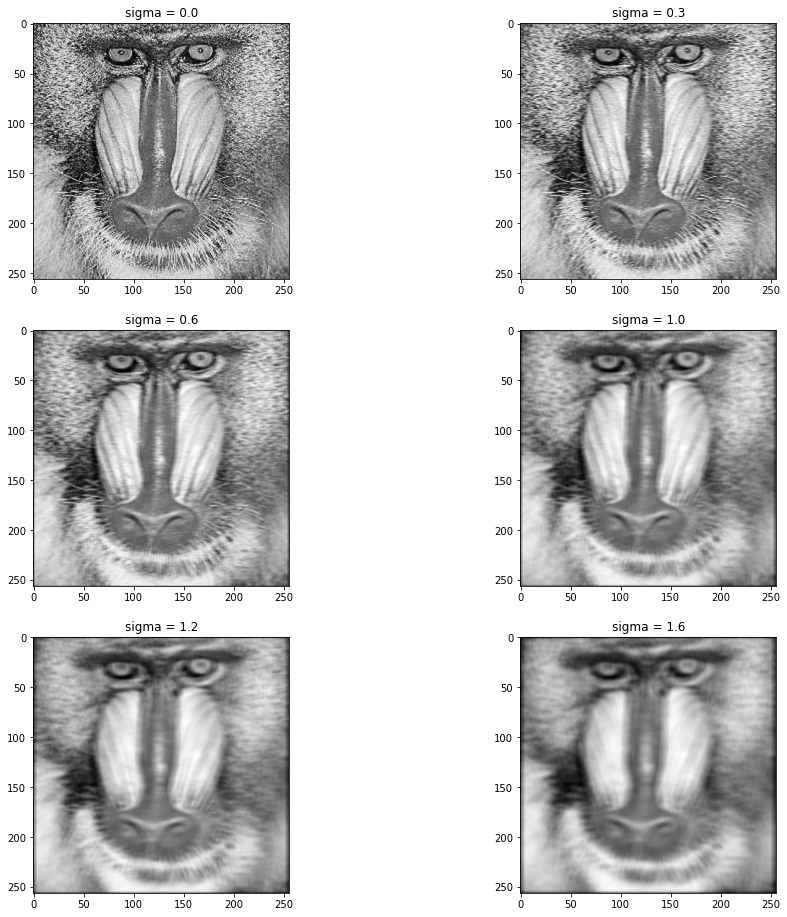

In [111]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(16,16))
ax1.imshow(op1,cmap='gray')
ax1.title.set_text(rf"sigma = {sigma[0]}")
ax2.imshow(op2,cmap='gray')
ax2.title.set_text(rf"sigma = {sigma[1]}")
ax3.imshow(op3,cmap='gray')
ax3.title.set_text(rf"sigma = {sigma[2]}")
ax4.imshow(op4,cmap='gray')
ax4.title.set_text(rf"sigma = {sigma[3]}")
ax5.imshow(op5,cmap='gray')
ax5.title.set_text(rf"sigma = {sigma[4]}")
ax6.imshow(op6,cmap='gray')
ax6.title.set_text(rf"sigma = {sigma[5]}")
plt.show()

**OBSERVATIONS**

We can make the following observations :

* While performing gaussian blur image padding is necessary otherwise mismatch will occur.
* As we increase $\sigma$ value we get more blurred images.
* Blurring in general can be observed as a low pass filtering operation, since, as we increase blur sharp edges get smoothened.
